In [1]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
for_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_June_28_2022\SAR_CPLX_20220517T093239_13.5G_VV_33_pres_1_fdc_auto.sar_INF_SAR_CPLX_20220517T093239_13.5G_VV_34_pres_1_fdc_auto.sar.nc"
aft_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_June_28_2022\SAR_CPLX_20220517T093239_13.5G_VV_77_pres_1_fdc_auto.sar_INF_SAR_CPLX_20220517T093239_13.5G_VV_78_pres_1_fdc_auto.sar.nc"

ds_for = xr.open_dataset(for_file, engine="netcdf4")
ds_aft = xr.open_dataset(aft_file, engine="netcdf4")



In [3]:
#Master fore
M_1=ds_for.SigmaImageSingleLookRealPart * (1j * ds_for.SigmaImageSingleLookImaginaryPart)
#Slave fore
S_1=ds_for.SigmaImageSingleLookRealPartSlave * (1j * ds_for.SigmaImageSingleLookImaginaryPartSlave)
#Interferogram fore
PHI_1=np.angle(M_1 * S_1.conj().T)

#Master aft
M_2=ds_aft.SigmaImageSingleLookRealPart * (1j * ds_aft.SigmaImageSingleLookImaginaryPart)
#Slave aft
S_2=ds_aft.SigmaImageSingleLookRealPartSlave * (1j * ds_aft.SigmaImageSingleLookImaginaryPartSlave)
#Interferogram fore
PHI_2=np.angle(M_2 * S_2.conj().T)




In [34]:
M_2.shape


(2080, 371)

In [46]:
Vp_1 = ds_for.MeanForwardVelocity
Vp_2 = ds_aft.MeanForwardVelocity
c = 299702547 #speed of light in air
fc = ds_for.CentralFreq #radar frequency
ke = (2 * np.pi) / (c / fc) #radar wavenumber


X, Y = np.meshgrid(ds_for.CrossRange, ds_for.GroundRange, indexing='ij')
Theta_1 = np.arctan(ds_for.OrbHeightImage / Y) #Incidence angle, fore
B = 0.5 #baseline, dummy until accurate measurement found
u_rsv_1 = -(Vp_1 / (ke * B)) * (PHI_1 / np.sin(Theta_1)) #radial surface velocity, fore



t_1 = ds_for.OrbTimeImage #GPS time of each pixel, fore
t_2 = ds_aft.OrbTimeImage #GPS time of each pixel, aft
m,n = X.shape
Head_1 = np.zeros(X.shape) #Aircraft heading of each pixel
for i in range(m):
    Head_1[i, 0:-1] = np.interp(t_1[i, 0:-1], ds_for.GPSTime, ds_for.OrbitHeading)

    
    
X, Y = np.meshgrid(ds_aft.CrossRange, ds_aft.GroundRange, indexing='ij')
Theta_2 = np.arctan(ds_aft.OrbHeightImage / Y) #Incidence angle, aft
u_rsv_2 = (Vp_2 / (ke * B)) * (PHI_2 / np.sin(Theta_2)) #radial surface velocity, aft    
Head_2 = np.zeros(X.shape) #Aircraft heading of each pixel
for i in range(m):
    Head_2[i, 0:-1] = np.interp(t_2[i, 0:-1], ds_aft.GPSTime, ds_aft.OrbitHeading)  
u_rsv_2 = -(Vp_2 / (ke * B)) * (PHI_2 / np.sin(Theta_2)) #radial surface velocity, aft



Text(0.5, 1.0, 'Radial surface velocity, fore direction')

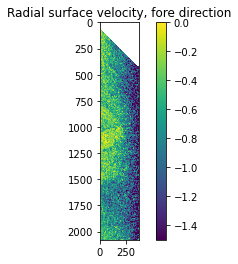

In [59]:
ax=mpl.pyplot.imshow(u_rsv_1,vmin=-1.5,vmax=0)
mpl.pyplot.colorbar()
mpl.pyplot.title('Radial surface velocity, fore direction')

Text(0.5, 1.0, 'Radial surface velocity, aft direction')

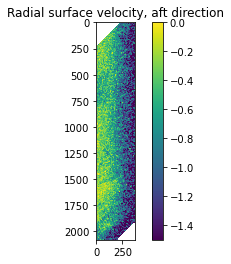

In [60]:
ax=mpl.pyplot.imshow(u_rsv_2,vmin=-1.5,vmax=0)
mpl.pyplot.colorbar()
mpl.pyplot.title('Radial surface velocity, aft direction')